For this use case, we start with the Satellogic dataset https://satellogic-earthview.s3.us-west-2.amazonaws.com/index.html

The dataset is located in a public AWS S3 bucket.

We can retrieve the metadata from the dataset in the form of a parquet file using the following command:

In [1]:
# !curl -O https://satellogic-earthview.s3.us-west-2.amazonaws.com/colab/satellogic-earthview-items.parquet

In [2]:
import geopandas as gpd

# gdf = gpd.read_parquet('satellogic-earthview-items.parquet')
gdf = gpd.read_parquet('/fastdata/Satellogic/data/satellogic-earthview-items-with-matches.parquet')

In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   json_path  1000000 non-null  object        
 1   zone       1000000 non-null  object        
 2   region     1000000 non-null  object        
 3   date       1000000 non-null  datetime64[ns]
 4   geometry   1000000 non-null  geometry      
 5   matches    1000000 non-null  object        
dtypes: datetime64[ns](1), geometry(1), object(4)
memory usage: 45.8+ MB


In [4]:
gdf.head()

,json_path,zone,region,date,geometry,matches
0,data/json/zone=51S/region=357067_6579845/date=...,51S,357067_6579845,2022-10-26,"POLYGON ((121.50829 -30.90962, 121.50835 -30.9...",[{'id': 'S2B_MSIL2A_20221027T015619_N0400_R117...
1,data/json/zone=46N/region=374867_2457086/date=...,46N,374867_2457086,2022-12-25,"POLYGON ((91.78970 22.21120, 91.78967 22.21467...",[{'id': 'S2B_MSIL2A_20221227T043209_N0509_R133...
2,data/json/zone=38N/region=601805_4299370/date=...,38N,601805_4299370,2022-10-05,"POLYGON ((46.17736 38.83375, 46.17741 38.83721...",[{'id': 'S2B_MSIL2A_20221008T074809_N0400_R135...
3,data/json/zone=20S/region=598796_7170926/date=...,20S,598796_7170926,2022-09-03,"POLYGON ((-62.01249 -25.57924, -62.01252 -25.5...",[{'id': 'S2B_MSIL2A_20220906T140709_N0400_R110...
4,data/json/zone=50N/region=698978_4416263/date=...,50N,698978_4416263,2022-09-04,"POLYGON ((119.33101 39.86955, 119.33112 39.873...",[{'id': 'S2A_MSIL2A_20220906T025541_N0400_R032...


In [5]:
zones = gdf['zone'].unique()
zones, len(zones)

(array(['51S', '46N', '38N', '20S', '50N', '29N', '33S', '30N', '39N',
        '55N', '44N', '56S', '31N', '28N', '40N', '49N', '10N', '34N',
        '15N', '13N', '14N', '11N', '33N', '42N', '12N', '50S', '57N',
        '18S', '17N', '37N', '16N', '53N', '21S', '18N', '34S', '19N',
        '36N', '35N', '45N', '54S', '17S', '23S', '35S', '20N', '32N',
        '43N', '41N', '48N', '36S', '21N', '52N', '60S', '32S', '19S',
        '47N', '55S', '54N', '51N', '53S', '22S', '04N', '27N', '25S',
        '08N', '24S', '37S', '09N', '43S', '52S'], dtype=object),
 69)

In [220]:
ix = 30

In [459]:
ix = ix + 1

Error loading /fastdata/Satellogic/data/tifs/satellogic/20220706_012145_SN13_52S_699815_8606482_TOA.tif: /fastdata/Satellogic/data/tifs/satellogic/20220706_012145_SN13_52S_699815_8606482_TOA.tif: No such file or directory
Error loading /fastdata/Satellogic/data/tifs/satellogic/20220706_012145_SN13_52S_704039_8621842_TOA.tif: /fastdata/Satellogic/data/tifs/satellogic/20220706_012145_SN13_52S_704039_8621842_TOA.tif: No such file or directory
Error loading /fastdata/Satellogic/data/tifs/satellogic/20220706_012145_SN13_52S_703271_8631058_TOA.tif: /fastdata/Satellogic/data/tifs/satellogic/20220706_012145_SN13_52S_703271_8631058_TOA.tif: No such file or directory
Error loading /fastdata/Satellogic/data/tifs/satellogic/20220706_012145_SN13_52S_704039_8626450_TOA.tif: /fastdata/Satellogic/data/tifs/satellogic/20220706_012145_SN13_52S_704039_8626450_TOA.tif: No such file or directory
Error loading /fastdata/Satellogic/data/tifs/satellogic/20220706_012145_SN13_52S_704039_8615314_TOA.tif: /fastda

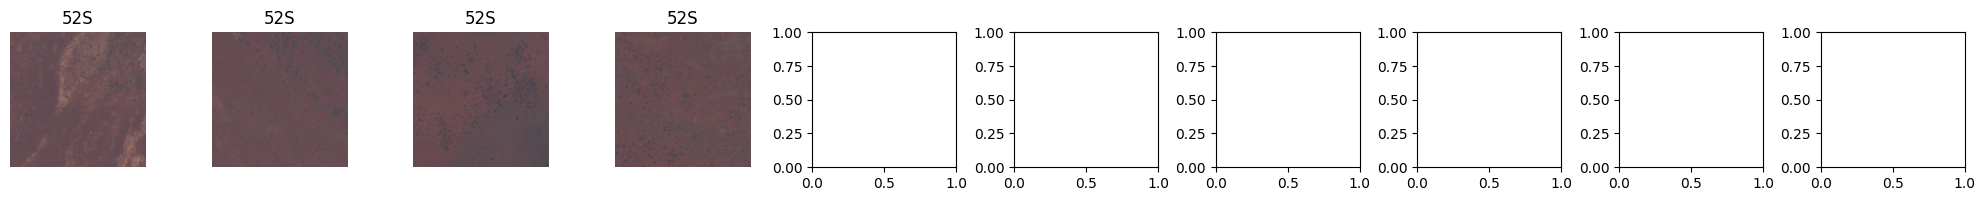

In [463]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import rasterio as rio

for zone in zones:
	zone = zones[ix]
	zone_gdf = gdf[gdf['zone'] == zone]
	samples = zone_gdf.sample(10)
	fig, ax = plt.subplots(1,10, figsize=(20,2))
	count = 0
	for i, sample in samples.iterrows():
		json_path = sample.json_path.replace('data/', '/fastdata/Satellogic/data/')
		with open(json_path, 'r') as f:
			metadata = json.load(f)
		url = metadata['assets']['analytic']['href']
		hr_path = Path("/fastdata/Satellogic/data/tifs/satellogic") / url.split('/')[-1]
		# name = json_path.split('/')[-1].replace('_metadata.json', '_S2L2A')
		# lr_path = "/fastdata/Satellogic/data/tifs/sentinel2/" + name + '.tif'
		try:
			hr = rio.open(hr_path).read((1,2,3))
		except Exception as e:
			print(f"Error loading {hr_path}: {e}")
			continue
		# lr = rio.open(lr_path).read((3,2,1))
		ax[count].imshow(hr.transpose(1,2,0) / 4000)
		ax[count].axis('off')
		ax[count].set_title(zone)
		count += 1
		# ax[1].imshow(lr.transpose(1,2,0) / 4000)
		# ax[1].axis('off')
	plt.tight_layout()
	plt.show()
	break


In [205]:
ignore_zones = [
    '33S',
    '39N',
    '55N',
    '44N',
    '28N',
    '40N',
    '49N',
    '34N',
    '11N',
    '12N',
    '50S',
    '57N',
    '18S',
    '17N',
    '53N',
    '34S',
    '19N',
    '36N',
    '35N',
    '45N',
    '17S',
    '20N',
    '41N',
    '21N',
    '52N',
    '60S',
    '32S',
    '19S',
    '54N',
    '53S',
    '04N',
    '27N',
    '25S',
    '08N',
    '37S',
    '09N',
    '43S',
    '52S'
]